# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Determine Url
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={unit}&q="

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
# establish all the lists
city_list = []        
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

record = 0 
set_count = 1

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        response['coord']['lat']
        if record >48:
            record=0
            set_count+=1
            city_list.append(city)
        else:
            record+=1
            city_list.append(city)
        print(f"Processing Record {record} of Set {set_count} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\
       Data Retrieval Complete\
       ------------------------------")

        

        
        
        
        

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [54]:
# Build DataFrame
city_weather_df = pd.DataFrame({'City':city_list,
                                'Country':country,
                                'Latitude':lat,
                                'Longitude':lng,
                                'Date':date,
                                'Max Temperature (Celsius)':max_temp,
                                'Humidity(%)':humidity,
                                'Cloudiness':cloudiness,
                                'Wind Speed(km/h)':wind_speed})
city_weather_df

,City,Country,Latitude,Longitude,Date,Max Temperature (Celsius),Humidity(%),Cloudiness,Wind Speed(km/h)
0,kapaa,US,22.08,-159.32,1587947208,27.00,65,20,5.70
1,georgetown,MY,5.41,100.34,1587947208,26.00,88,20,1.50
2,kodiak,US,57.79,-152.41,1587947208,11.00,43,75,5.10
3,xichang,CN,27.90,102.26,1587947209,12.25,39,100,1.64
4,dingle,PH,11.00,122.67,1587947209,28.37,74,88,5.65
...,...,...,...,...,...,...,...,...,...
581,hailar,CN,49.20,119.70,1587947361,10.60,31,95,5.88
582,skelleftea,SE,64.75,20.95,1587947361,1.00,64,33,2.60
583,roberval,CA,48.52,-72.23,1587947361,3.00,44,20,3.10
584,black forest,US,39.01,-104.70,1587947125,17.22,31,90,4.10


In [55]:
# Output the Result
city_weather_df.to_csv('../Homework_Output/CityWeatherData.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [58]:
city_weather_df.loc[city_weather_df['Humidity(%)']>100,:]

,City,Country,Latitude,Longitude,Date,Max Temperature (Celsius),Humidity(%),Cloudiness,Wind Speed(km/h)


In [59]:
#  Get the indices of cities that have humidity over 100%.
print('There is not a city with a humidity over 100%')

There is not a city with a humidity over 100%


In [60]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [61]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

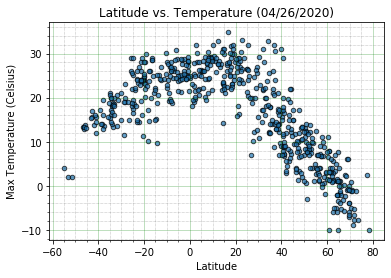

In [71]:
# Create Scatter Plot
fig, ax = plt.subplots()
city_weather_df.plot(kind='scatter', x='Latitude', y='Max Temperature (Celsius)', ax=ax,alpha = 0.7,edgecolors = 'black')
plt.title("Latitude vs. Temperature (04/26/2020)")
# Turn on the grid
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5',alpha = 0.5, color='green')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5',alpha = 0.5, color='black')
plt.savefig('../Homework_Output/Lat v. Temp.png')
plt.show()

## Latitude vs. Humidity Plot

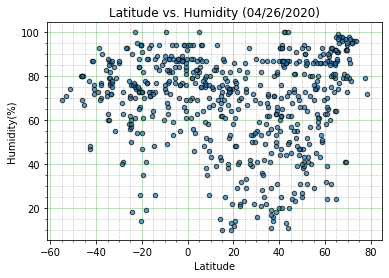

In [66]:
# Create Scatter Plot
fig, ax = plt.subplots()
city_weather_df.plot(kind='scatter', x='Latitude', y='Humidity(%)', ax=ax,alpha = 0.7,edgecolors = 'black')
plt.title("Latitude vs. Humidity (04/26/2020)")
# Turn on the grid
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5',alpha = 0.5, color='green')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5',alpha = 0.5, color='black')
plt.savefig('../Homework_Output/Lat v. Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

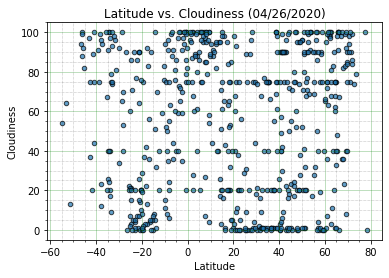

In [13]:
# Create Scatter Plot
fig, ax = plt.subplots()
city_weather_df.plot(kind='scatter', x='Latitude', y='Cloudiness', ax=ax,alpha = 0.7,edgecolors = 'black')
plt.title("Latitude vs. Cloudiness (04/26/2020)")
plt.ylabel('Cloudiness')
# Turn on the grid
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5',alpha = 0.5, color='green')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5',alpha = 0.5, color='black')
plt.savefig('../Homework_Output/Lat v. Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

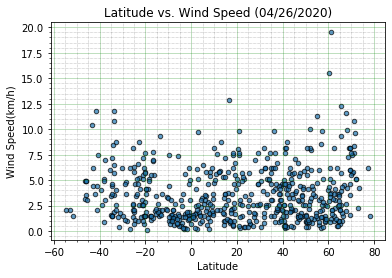

In [67]:
# Create Scatter Plot
fig, ax = plt.subplots()
city_weather_df.plot(kind='scatter', x='Latitude', y='Wind Speed(km/h)', ax=ax,alpha = 0.7,edgecolors = 'black')
plt.title("Latitude vs. Wind Speed (04/26/2020)")
# Turn on the grid
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5',alpha = 0.5, color='green')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5',alpha = 0.5, color='black')
plt.savefig('../Homework_Output/Lat v. Wind Speed.png')
plt.show()

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots

In [82]:
# Create Northern and Southern Hemisphere DataFrames

# North Hemi
north_hemi_df = city_weather_df.loc[city_weather_df['Latitude']>0,:]

# South Hemi
south_hemi_df = city_weather_df.loc[city_weather_df['Latitude']<0,:]
north_hemi_df

,City,Country,Latitude,Longitude,Date,Max Temperature (Celsius),Humidity(%),Cloudiness,Wind Speed(km/h)
0,kapaa,US,22.08,-159.32,1587947208,27.00,65,20,5.70
1,georgetown,MY,5.41,100.34,1587947208,26.00,88,20,1.50
2,kodiak,US,57.79,-152.41,1587947208,11.00,43,75,5.10
3,xichang,CN,27.90,102.26,1587947209,12.25,39,100,1.64
4,dingle,PH,11.00,122.67,1587947209,28.37,74,88,5.65
...,...,...,...,...,...,...,...,...,...
580,yarmouth,US,41.71,-70.23,1587947360,9.00,87,90,8.70
581,hailar,CN,49.20,119.70,1587947361,10.60,31,95,5.88
582,skelleftea,SE,64.75,20.95,1587947361,1.00,64,33,2.60
583,roberval,CA,48.52,-72.23,1587947361,3.00,44,20,3.10


In [85]:
hemi_dict= ({'1':north_hemi_df,
             '2':south_hemi_df})
index_dict = ({'1':'City',
               '2':'Country',
               '3':'Latitude',
               '4':'Longitude',
               '5':'Date',
               '6':'Max Temperature (Celsius)',
               '7':'Humidity(%)',
               '8':'Cloudiness',
               '9':'Wind Speed(km/h)'})
def linear_generator():
    hemi_info = hemi_dict.get(input(f"1.Northern Hemisphere\n2.Southern Hemisphere\n\
    Which Hemisphere are you looking to see?"))
    first_index_info = index_dict.get(input(f"{index_dict} Key in the first value you want to compare"))
    second_index_info = index_dict.get(input(f"{index_dict} Key in the second value you want to compare"))

    x_value = hemi_info[first_index_info]
    y_value = hemi_info[second_index_info]
    # Create Scatter Plot
#     north_temp = north_hemi_df['Max Temperature']
    cw_slope, cw_int, cw_r, cw_p, cw_std_err = stats.linregress(x_value, y_value)
    cw_fit = cw_slope * x_value + cw_int
    fig, ax = plt.subplots()
    hemi_info.plot(kind='scatter', x=first_index_info, y=second_index_info, ax=ax,alpha = 0.7,edgecolors = 'black')
    # plt.title("Max Temp vs. Latitude (Northern Hemi)")
    # plt.xlabel('Max Temperature (Celsius)')
    plt.plot(x_value,cw_fit,"--")
    # Turn on the grid
    ax.minorticks_on()
    ax.grid(which='major', linestyle='-', linewidth='0.5',alpha = 0.5, color='green')
    # Customize the minor grid
    ax.grid(which='minor', linestyle=':', linewidth='0.5',alpha = 0.5, color='black')
    plt.show()



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

1.Northern Hemisphere
2.Southern Hemisphere
    Which Hemisphere are you looking to see?1
{'1': 'City', '2': 'Country', '3': 'Latitude', '4': 'Longitude', '5': 'Date', '6': 'Max Temperature (Celsius)', '7': 'Humidity(%)', '8': 'Cloudiness', '9': 'Wind Speed(km/h)'} Key in the first value you want to compare6
{'1': 'City', '2': 'Country', '3': 'Latitude', '4': 'Longitude', '5': 'Date', '6': 'Max Temperature (Celsius)', '7': 'Humidity(%)', '8': 'Cloudiness', '9': 'Wind Speed(km/h)'} Key in the second value you want to compare3


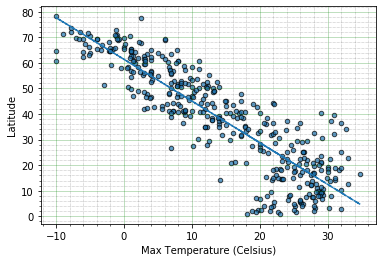

In [86]:
linear_generator()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

1.Northern Hemisphere
2.Southern Hemisphere
    Which Hemisphere are you looking to see?2
{'1': 'City', '2': 'Country', '3': 'Latitude', '4': 'Longitude', '5': 'Date', '6': 'Max Temperature (Celsius)', '7': 'Humidity(%)', '8': 'Cloudiness', '9': 'Wind Speed(km/h)'} Key in the first value you want to compare6
{'1': 'City', '2': 'Country', '3': 'Latitude', '4': 'Longitude', '5': 'Date', '6': 'Max Temperature (Celsius)', '7': 'Humidity(%)', '8': 'Cloudiness', '9': 'Wind Speed(km/h)'} Key in the second value you want to compare3


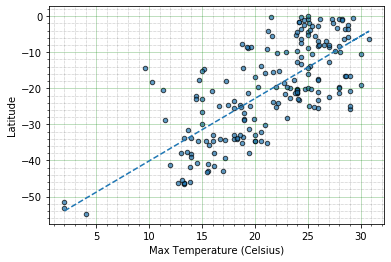

In [87]:
linear_generator()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

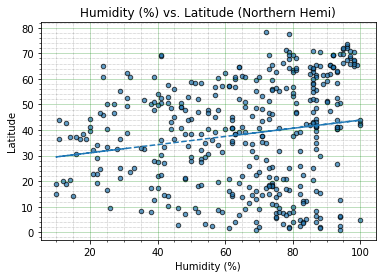

In [52]:
linear_generator()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

1.Northern Hemisphere
2.Southern Hemisphere
    Which Hemisphere are you looking to see?2
{'1': 'City', '2': 'Country', '3': 'Latitude', '4': 'Longitude', '5': 'Date', '6': 'Max Temperature (Celsius)', '7': 'Humidity(%)', '8': 'Cloudiness', '9': 'Wind Speed(km/h)'} Key in the first value you want to compare7
{'1': 'City', '2': 'Country', '3': 'Latitude', '4': 'Longitude', '5': 'Date', '6': 'Max Temperature (Celsius)', '7': 'Humidity(%)', '8': 'Cloudiness', '9': 'Wind Speed(km/h)'} Key in the second value you want to compare3


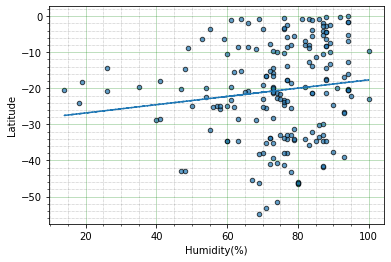

In [88]:
linear_generator()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [51]:
linear_generator()

<function __main__.linear_generator()>

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
linear_generator()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
linear_generator()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
linear_generator()